### Multinomial Logistic Regression

In [4]:
# Code By Bhavy Kharbanda
# Sap Id: 500082531

In [5]:
# Importing the libraries
# Transforms are used for image transformations

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim # For the optimizer

from matplotlib.transforms import Transform
import matplotlib.pyplot as plt
import numpy as np



In [6]:
# for converting python image library(PIL) image to tensor objects
transform=transforms.ToTensor()

# Data Loading 
# Loading the data using torchvision
# MNIST data: Modified National Institute of Standards and Technology dataset
# It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9


traindata=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(traindata,batch_size=32,shuffle=False)

testdata=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testdata,batch_size=32,shuffle=False)

In [7]:
# Showing the imges
def imshow(img):
  img=img.numpy()
  img=np.transpose(img,(1,2,0))
  plt.imshow(img)
  plt.show()

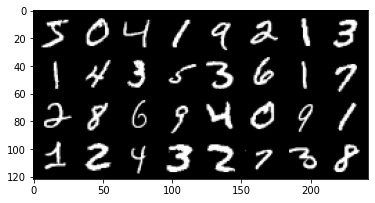

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8])


In [8]:
# Adding labels to the data
# Itterating tthrough the data loader object
dataiter=iter(trainloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(labels)

In [9]:
# Size of the images
images.view(images.size(0),-1).shape

torch.Size([32, 784])

In [10]:
# Printing the size of image at 0 index
print(images[0].shape)

# 28X28 pixel square

torch.Size([1, 28, 28])


In [11]:
# Creating a Logistic net for the data
class LogisticNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(1*28*28,100)
    self.layer2=nn.Linear(100,30)
    self.layer3=nn.Linear(30,10)
    
  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=self.layer3(x)
    return x

model=LogisticNet()
# Logistic net has three layers


In [12]:
# Calling the model.
model

LogisticNet(
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=30, bias=True)
  (layer3): Linear(in_features=30, out_features=10, bias=True)
)

In [13]:
# Training the model
def train_mnst(model,train_loader,test_loader,EPOCHS=100,lr=.001,seed=32):
  torch.manual_seed(seed)
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  cost=[]
  model.to(device)
  optimizer=optim.SGD(model.parameters(),lr=lr)
  loss_function=nn.CrossEntropyLoss()
  for epoch in range(EPOCHS):

    curr_loss=0.0
    currect=0.0
    t_currect=0.0
    for i,data in enumerate(train_loader,0):


      # Get a Batch of Data
      input,target=data[0].to(device),data[1].to(device)
      # 1. Compute the output
     
      # Flatten the input
      input=input.view(input.size(0),-1)
      yhat=model(input)
      
      # 2. Compute the loss
      loss=loss_function(yhat,target)

      # 3. Compute the gradient

      optimizer.zero_grad()
      loss.backward()
    
      # 4. Update the parameters

      optimizer.step()
      # Log the record
      with torch.no_grad():
        yhat=model(input)
        err=loss_function(yhat,target)
        curr_loss+=err
        b_currect=((torch.argmax(yhat,dim=1)==target).sum()).float()
      
        currect+=b_currect

    # Calculate the accuracy    
    with torch.no_grad():
      for data in test_loader:
          ims,lbs=data[0].to(device),data[1].to(device)
          pred=model(ims.view(ims.size(0),-1))
          t_currect+=(torch.argmax(pred,dim=1)==lbs).sum()
   
      print('Current Epoch: %3d' %(epoch+1),end="")
      print(' | Loss: %5.2f' %curr_loss,end="")
      accuracy=currect.sum()/len(traindata)*100
      test_accuracy=t_currect.sum()/len(testdata)*100
      # printing the accuracy
      print(' | Accuracy: %.2f' %accuracy,end="")
      print(' | Test Accuracy: %.2f' %test_accuracy )
  return cost

In [14]:
# Calculating the cost or loss function for eacg epochs
cost=train_mnst(model,trainloader,testloader,EPOCHS=30)

Current Epoch:   1 | Loss: 4260.68 | Accuracy: 17.46 | Test Accuracy: 28.25
Current Epoch:   2 | Loss: 4042.46 | Accuracy: 39.56 | Test Accuracy: 45.95
Current Epoch:   3 | Loss: 3571.45 | Accuracy: 52.76 | Test Accuracy: 61.56
Current Epoch:   4 | Loss: 2714.18 | Accuracy: 67.83 | Test Accuracy: 74.27
Current Epoch:   5 | Loss: 1851.24 | Accuracy: 77.48 | Test Accuracy: 80.48
Current Epoch:   6 | Loss: 1392.88 | Accuracy: 81.33 | Test Accuracy: 82.87
Current Epoch:   7 | Loss: 1165.04 | Accuracy: 83.55 | Test Accuracy: 84.89
Current Epoch:   8 | Loss: 1031.23 | Accuracy: 85.03 | Test Accuracy: 86.23
Current Epoch:   9 | Loss: 942.45 | Accuracy: 86.19 | Test Accuracy: 87.01
Current Epoch:  10 | Loss: 878.82 | Accuracy: 87.04 | Test Accuracy: 87.52
Current Epoch:  11 | Loss: 830.85 | Accuracy: 87.64 | Test Accuracy: 88.07
Current Epoch:  12 | Loss: 793.35 | Accuracy: 88.14 | Test Accuracy: 88.49
Current Epoch:  13 | Loss: 763.17 | Accuracy: 88.58 | Test Accuracy: 88.81
Current Epoch:  1

In [15]:
len(traindata)

60000

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
prob=model(images.view(32,-1).to(device))
(torch.argmax(prob,dim=1).to('cpu')==labels).sum().float()/32*100

tensor(93.7500)